# Clinical Evaluation

The first two sheets include clinical annotations of all the patients for disease-free survival/recurrence and for overall survival. 

To perform clinical evaluation specific output format should be obtained!
\
These are the columns and their order:
\
Some new columns need to be created and added, e.g. (DISEASE FREE FOR MORE THAN 5 YEARS becomes 1) IFF (DFS_STATUS IS 'DiseaseFree'
 AND DFS_MONTHS IS >60 MONTHS)

In [334]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import FunctionTransformer

plt.style.use('ggplot')
sns.set_theme()
plt.rcParams["figure.figsize"] = (12, 4)

df_clinical_dfs = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='ALL BREAST TCGA-PANCA DFS')
df_clinical_dfs.head()

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971


In [335]:
df_clinical_os = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='ALL BREAST TCGA PANCA OS')
print(df_clinical_os.shape)
df_clinical_os.head()

(1084, 4)


,Study ID,Patient ID,OS_STATUS,OS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,LIVING,133.050597
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,LIVING,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,LIVING,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,LIVING,47.604958
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,LIVING,11.440971


In [336]:
df_clinical_out_cols = pd.read_excel(r'../data/OS_DFS_TCGA_TCGATEST_PANCA.xlsx', engine='openpyxl', sheet_name='EXAMPLE output - OS DFS SUBTYPE').columns
df_clinical_out_cols = df_clinical_out_cols[:-2]
df_clinical_out_cols

Index(['Patient ID', 'DFS_STATUS', 'DFS_MONTHS', 'RECURRED BEFORE 5 YEARS',
       'RECURRED AFTER FIVE YEARS', 'DISEASE FREE FOR LESS THAN 5 YEARS',
       'DISEASE FREE FOR MORE THAN 5 YEARS', 'OS_STATUS', 'OS_MONTHS',
       'DECEASED WITHIN 5 YEARS', 'SUBTYPE', 'IS LUMA',
       'TRAINING OR TESTING?'],
      dtype='object')

In [337]:
with open('../data/dataset_multilabel.pkl', 'rb') as file:
    df_multi = pickle.load(file)

df_multi = discard_negative_correlations(df_multi)

print(df_multi.shape)
df_multi.head()

(1053, 25159)


/Users/ivamilojkovic/Breast-Cancer-Analysis/src/utils.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['LumA'][dataset['LumA'] < 0] = 0
/Users/ivamilojkovic/Breast-Cancer-Analysis/src/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['LumB'][dataset['LumB'] < 0] = 0
/Users/ivamilojkovic/Breast-Cancer-Analysis/src/utils.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Basal'][dataset['Basal'] < 

,tcga_id,expert_PAM50_subtype,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,ZYX,ZZEF1,ZZZ3,Subtype-from Parker centroids,MaxCorr,Basal,Her2,LumA,LumB,Normal
0,TCGA-3C-AAAU,LumA,57898,67829,134,1697402,44314,1737,568,0,...,1054121,557596,409660,LumA,0.373445,0.0,0.000000,0.373445,0.179928,0.000000
1,TCGA-3C-AALI,Her2,52146,65152,1361,1403901,36852,1636,1357,41,...,1041074,247545,88163,Her2,0.647827,0.0,0.647827,0.000000,0.247731,0.000000
2,TCGA-3C-AALJ,LumB,52172,29356,510,989281,30378,282,1974,119,...,613785,110466,68745,LumB,0.357503,0.0,0.000000,0.144970,0.357503,0.000000
3,TCGA-3C-AALK,LumA,50517,43436,287,2674831,69374,816,2084,172,...,1397623,196615,206477,LumA,0.666747,0.0,0.000000,0.666747,0.000000,0.458535
4,TCGA-4H-AAAK,LumA,66433,66229,192,2279532,56667,1603,2425,246,...,970767,199472,246179,LumA,0.556303,0.0,0.000000,0.556303,0.000000,0.503962


In [338]:
# Merge the dataframes based on the 'ID' column
merged_df = pd.merge(df_clinical_dfs, df_clinical_os, on=['Patient ID', 'Study ID'])
merged_df

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444,LIVING,133.050597
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790,LIVING,131.669790
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743,LIVING,48.459743
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN,LIVING,47.604958
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971,LIVING,11.440971
...,...,...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,DiseaseFree,29.029819,LIVING,29.029819
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,DiseaseFree,15.353256,LIVING,15.353256
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,DiseaseFree,16.043660,LIVING,16.043660
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,NaN,NaN,LIVING,108.064569


In [339]:
merged_df['OS_STATUS'].unique()

array(['LIVING', 'DECEASED', nan], dtype=object)

In [340]:
# Add new columns
merged_df['DISEASE FREE FOR MORE THAN 5 YEARS'] = (merged_df['DFS_STATUS'] == 'DiseaseFree') & (merged_df['DFS_MONTHS'] > 5*12)
merged_df['DISEASE FREE FOR LESS THAN 5 YEARS'] = (merged_df['DFS_STATUS'] == 'DiseaseFree') & (merged_df['DFS_MONTHS'] <= 5*12)
merged_df['RECURRED AFTER 5 YEARS'] = (merged_df['DFS_STATUS'] == 'Recurred/Progressed') & (merged_df['DFS_MONTHS'] > 5*12)
merged_df['RECURRED BEFORE 5 YEARS'] = (merged_df['DFS_STATUS'] == 'Recurred/Progressed') & (merged_df['DFS_MONTHS'] <= 5*12)
merged_df['DECEASED WITHIN 5 YEARS'] = (merged_df['OS_STATUS'] == 'DECEASED') & (merged_df['OS_MONTHS'] <= 5*12)
merged_df

,Study ID,Patient ID,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,NaN,NaN,LIVING,47.604958,False,False,False,False,False
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,DiseaseFree,29.029819,LIVING,29.029819,False,True,False,False,False
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,DiseaseFree,15.353256,LIVING,15.353256,False,True,False,False,False
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,DiseaseFree,16.043660,LIVING,16.043660,False,True,False,False,False
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,NaN,NaN,LIVING,108.064569,False,False,False,False,False


In [341]:
df_multi.rename(columns={'tcga_id': 'Patient ID'}, inplace=True)
df_out_1 = pd.merge(df_multi, merged_df, on='Patient ID', how='left')
df_out_1.drop(columns=df_out_1.columns[2:-9], inplace=True)
df_out_1

,Patient ID,expert_PAM50_subtype,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,TCGA-3C-AAAU,LumA,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,TCGA-3C-AALI,Her2,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,TCGA-3C-AALJ,LumB,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
3,TCGA-3C-AALK,LumA,NaN,NaN,LIVING,47.604958,False,False,False,False,False
4,TCGA-4H-AAAK,LumA,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048,TCGA-BH-A42U,Normal,DiseaseFree,110.596048,LIVING,110.596048,True,False,False,False,False
1049,TCGA-E2-A108,Normal,DiseaseFree,27.517507,LIVING,27.517507,False,True,False,False,False
1050,TCGA-EW-A1P7,Normal,Recurred/Progressed,23.966861,LIVING,30.081862,False,False,False,True,False
1051,TCGA-EW-A1PG,Normal,DiseaseFree,34.553046,LIVING,34.553046,False,True,False,False,False


In [342]:
df_out_1.isna().sum(axis=0)

Patient ID                              0
expert_PAM50_subtype                    0
DFS_STATUS                            140
DFS_MONTHS                            141
OS_STATUS                               5
OS_MONTHS                               6
DISEASE FREE FOR MORE THAN 5 YEARS      5
DISEASE FREE FOR LESS THAN 5 YEARS      5
RECURRED AFTER 5 YEARS                  5
RECURRED BEFORE 5 YEARS                 5
DECEASED WITHIN 5 YEARS                 5
dtype: int64

In [343]:
# Remove NaN rows
df_out_1.dropna(inplace=True)
df_out_1.isna().sum()

Patient ID                            0
expert_PAM50_subtype                  0
DFS_STATUS                            0
DFS_MONTHS                            0
OS_STATUS                             0
OS_MONTHS                             0
DISEASE FREE FOR MORE THAN 5 YEARS    0
DISEASE FREE FOR LESS THAN 5 YEARS    0
RECURRED AFTER 5 YEARS                0
RECURRED BEFORE 5 YEARS               0
DECEASED WITHIN 5 YEARS               0
dtype: int64

In [344]:
df_out_1

,Patient ID,expert_PAM50_subtype,DFS_STATUS,DFS_MONTHS,OS_STATUS,OS_MONTHS,DISEASE FREE FOR MORE THAN 5 YEARS,DISEASE FREE FOR LESS THAN 5 YEARS,RECURRED AFTER 5 YEARS,RECURRED BEFORE 5 YEARS,DECEASED WITHIN 5 YEARS
0,TCGA-3C-AAAU,LumA,Recurred/Progressed,59.440444,LIVING,133.050597,False,False,False,True,False
1,TCGA-3C-AALI,Her2,DiseaseFree,131.669790,LIVING,131.669790,True,False,False,False,False
2,TCGA-3C-AALJ,LumB,DiseaseFree,48.459743,LIVING,48.459743,False,True,False,False,False
4,TCGA-4H-AAAK,LumA,DiseaseFree,11.440971,LIVING,11.440971,False,True,False,False,False
7,TCGA-A1-A0SG,LumA,DiseaseFree,14.268337,LIVING,14.268337,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048,TCGA-BH-A42U,Normal,DiseaseFree,110.596048,LIVING,110.596048,True,False,False,False,False
1049,TCGA-E2-A108,Normal,DiseaseFree,27.517507,LIVING,27.517507,False,True,False,False,False
1050,TCGA-EW-A1P7,Normal,Recurred/Progressed,23.966861,LIVING,30.081862,False,False,False,True,False
1051,TCGA-EW-A1PG,Normal,DiseaseFree,34.553046,LIVING,34.553046,False,True,False,False,False


## Models' Outputs

Few more columns to be added ('SUBTYPE', 'IS LUMA', 'TRAINING OR TESTING?') this can be obtained only after predictions are made

In [345]:
# Load test data
with open('../data/dataset_multilabel.pkl', 'rb') as file:
    data = pickle.load(file)
    X = data.drop(columns=['expert_PAM50_subtype', 'tcga_id',
                           'Subtype-from Parker centroids',	'MaxCorr',
                            'Basal', 'Her2', 'LumA', 'LumB', 'Normal'], inplace=False)
    y_orig = data.expert_PAM50_subtype
    y_pam50 = data['Subtype-from Parker centroids']

    # Take labels on whole dataset for PAM50
    y_corr = data[['Basal', 'Her2', 'LumA', 'LumB',	'Normal']]
    y_corr_non_neg = discard_negative_correlations(y_corr)

    # M-cut strategy to assign labels on whole dataset
    y_mcut_labels = m_cut_strategy_class_assignment(y_corr, non_neg_values=True)
    y_mcut_labels_neg = m_cut_strategy_class_assignment(y_corr, non_neg_values=False)
    
    # Compute labels from two strategies (M-cut and 5th percentile)
    y_mcut_5perc_labels = create_mcut_nth_percentile_labels(
        m_cut_labels=y_mcut_labels,
        correlations=y_corr_non_neg,
        y=y_pam50,
        keep_primary=True,
        N=5
    )
    
    X_train, X_test, \
    y_train_pam50, y_test_pam50, \
    y_train_mcut, y_test_mcut, \
    y_train_orig, y_test_orig, \
    y_train_5perc, y_test_5perc = \
        train_test_split(X, y_pam50, y_mcut_labels, y_orig, 
                        y_mcut_5perc_labels, test_size=0.3, random_state=1, stratify=y_pam50)

    # Data standardization | normalization
    X_train = X_train.divide(X_train.sum(axis=1), axis=0) * 1e6
    X_test = X_test.divide(X_test.sum(axis=1), axis=0) * 1e6
    scaler = FunctionTransformer(log_transform)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

    # Feature selection (based on original case)
    best_feat_model = SelectKBest(score_func=f_classif, k=500) 
    best_feat_model.fit(X_train_scaled, y_train_orig)
    df_scores = pd.DataFrame(best_feat_model.scores_)
    df_feats = pd.DataFrame(X.columns)

    featureScores = pd.concat([df_feats, df_scores],axis=1)
    featureScores.columns = ['Feature', 'Score'] 

    selected_feat = featureScores.sort_values(by='Score')[-500:]['Feature']

    X_train_scaled_selected = X_train_scaled[list(selected_feat)]
    X_test_scaled_selected = X_test_scaled[list(selected_feat)]

    # One-hot encoding of original and PAM50 labels
    y_train_orig = pd.get_dummies(y_train_orig)
    y_test_orig = pd.get_dummies(y_test_orig)
    y_train_pam50 = pd.get_dummies(y_train_pam50)
    y_test_pam50 = pd.get_dummies(y_test_pam50)

    # Merged train and test
    X_scaled_selected = pd.concat([X_train_scaled_selected, X_test_scaled_selected], axis=0)
    X_scaled_selected = X_scaled_selected.sort_index()


In [346]:
test_idx = y_test_5perc.index
test_tcga_idx = df_multi.iloc[test_idx, 0]
test_tcga_idx

34     TCGA-AC-A6IW
786    TCGA-C8-A27A
451    TCGA-AC-A2QI
11     TCGA-A2-A0YE
599    TCGA-D8-A27I
           ...     
995    TCGA-A2-A25B
917    TCGA-C8-A26X
148    TCGA-C8-A8HR
946    TCGA-AN-A0FN
991    TCGA-A1-A0SN
Name: Patient ID, Length: 316, dtype: object

In [347]:
with open('../models/multi-label_models/ml_best_model_lr03-07-2023_00:31:05.pkl', 'rb') as f:
    model_xgb_br = pickle.load(f)

with open('../models/multi-label_models/ml_chain_best_model_lr03-07-2023_02:03:48.pkl', 'rb') as f:
    model_xgb_cc = pickle.load(f)

with open('../models/multi-label_models/ml_best_model_lr05-07-2023_00:43:55.pkl', 'rb') as f:
    model_lr_br = pickle.load(f)

with open('../models/multi-label_models/ml_chain_best_model_lr05-07-2023_00:58:18.pkl', 'rb') as f:
    model_lr_cc = pickle.load(f)

with open('../models/multi-label_models/ml_best_model_lr06-07-2023_10:17:57.pkl', 'rb') as f:
    model_svm_lp = pickle.load(f)

with open('../models/multi-label_models/ml_best_model_lr05-07-2023_00:27:34.pkl', 'rb') as f:
    model_rf_lp = pickle.load(f)

In [348]:
## Get the predictions and probabilities for each model and set the original test indices

# XGBoost
xgb_br_preds = model_xgb_br.predict(X_test_scaled_selected).toarray()
xgb_br_preds = pd.DataFrame(xgb_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

xgb_cc_preds = model_xgb_cc.predict(X_test_scaled_selected).toarray()
xgb_cc_preds = pd.DataFrame(xgb_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

xgb_br_prob_preds = model_xgb_br.predict_proba(X_test_scaled_selected).toarray()
xgb_br_prob_preds = pd.DataFrame(xgb_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

xgb_cc_prob_preds = model_xgb_cc.predict_proba(X_test_scaled_selected).toarray()
xgb_cc_prob_preds = pd.DataFrame(xgb_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# Logistic Regression
lr_br_preds = model_lr_br.predict(X_test_scaled_selected).toarray()
lr_br_preds = pd.DataFrame(lr_br_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

lr_cc_preds = model_lr_cc.predict(X_test_scaled_selected).toarray()
lr_cc_preds = pd.DataFrame(lr_cc_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

lr_br_prob_preds = model_lr_br.predict_proba(X_test_scaled_selected).toarray()
lr_br_prob_preds = pd.DataFrame(lr_br_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

lr_cc_prob_preds = model_lr_cc.predict_proba(X_test_scaled_selected).toarray()
lr_cc_prob_preds = pd.DataFrame(lr_cc_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# SVM
svm_lp_preds = model_svm_lp.predict(X_test_scaled_selected).toarray()
svm_lp_preds = pd.DataFrame(svm_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

svm_lp_prob_preds = model_svm_lp.predict_proba(X_test_scaled_selected).toarray()
svm_lp_prob_preds = pd.DataFrame(svm_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

# Random Forest
rf_lp_preds = model_rf_lp.predict(X_test_scaled_selected).toarray()
rf_lp_preds = pd.DataFrame(rf_lp_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)

rf_lp_prob_preds = model_rf_lp.predict_proba(X_test_scaled_selected).toarray()
rf_lp_prob_preds = pd.DataFrame(rf_lp_prob_preds, columns=y_test_5perc.columns, index=y_test_5perc.index)


In [349]:
from multilabel_metrics import semi_relaxed_accuracy
print('XGBoost Binary Relevance: ', semi_relaxed_accuracy(xgb_br_prob_preds, y_test_pam50))
print('XGBoost Chain Classifier: ', semi_relaxed_accuracy(xgb_cc_prob_preds, y_test_pam50))
print('Logistic Regression Binary Relenace: ', semi_relaxed_accuracy(lr_br_prob_preds, y_test_pam50))
print('Logistic Regression Chain Classifier: ', semi_relaxed_accuracy(lr_cc_prob_preds, y_test_pam50))
print('SVM Label Powerset: ', semi_relaxed_accuracy(svm_lp_prob_preds, y_test_pam50))
print('Random Forest Label Powerset: ', semi_relaxed_accuracy(rf_lp_prob_preds, y_test_pam50))


XGBoost Binary Relevance:  0.879746835443038
XGBoost Chain Classifier:  0.8955696202531646
Logistic Regression Binary Relenace:  0.8734177215189873
Logistic Regression Chain Classifier:  0.8765822784810127
SVM Label Powerset:  0.8164556962025317
Random Forest Label Powerset:  0.870253164556962


In [350]:
count_number_of_labels(lr_br_preds)
# count_number_of_labels(lr_cc_preds)

[8, 148, 157, 3, 0, 0]

In [356]:
(svm_lp_preds.sum(axis=1) == 3).sum()

5

In [352]:
count_number_of_labels(svm_lp_preds)

[0, 172, 139, 5, 0, 0]

<Figure size 1200x400 with 0 Axes>

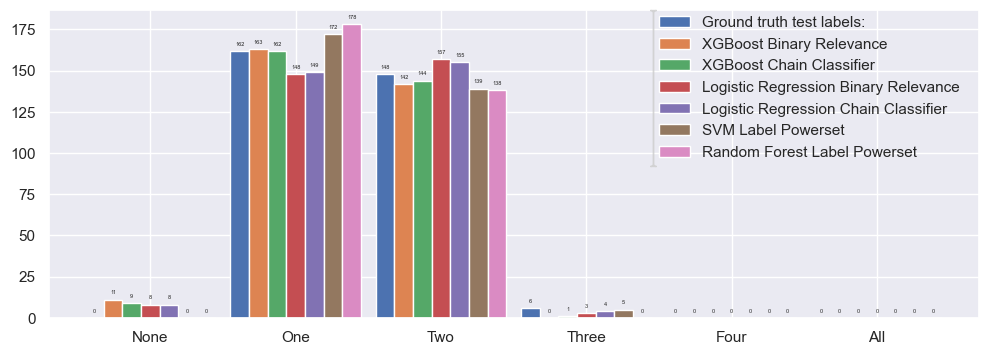

In [351]:
# Barplots for number of labels predicted
ax = plt.figure()
df_lr = pd.DataFrame({
    'Ground truth test labels:': count_number_of_labels(y_test_5perc),
    'XGBoost Binary Relevance': count_number_of_labels(xgb_br_preds),
    'XGBoost Chain Classifier': count_number_of_labels(xgb_cc_preds),
    'Logistic Regression Binary Relevance': count_number_of_labels(lr_br_preds),
    'Logistic Regression Chain Classifier': count_number_of_labels(lr_cc_preds),
    'SVM Label Powerset': count_number_of_labels(svm_lp_preds),
    'Random Forest Label Powerset': count_number_of_labels(rf_lp_preds),
    }, 
    index=['None', 'One', 'Two', 'Three', 'Four', 'All']
)
ax = df_lr.plot(kind='bar', rot=0, width = 0.9)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.0f'),
                (g.get_x() + g.get_width() / 2, g.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=4)
plt.legend(bbox_to_anchor=(0.65, 1), ncol=1, mode="expand", borderaxespad=0)

## Double check of these results

The strange thing that needs to be further explored is the non-existance of labels for the first 4 models/approaches. Firstly, let's check if the samples that have no labels assigned are similar among these models. 

In [314]:
# Get test samples' indices
preds_idx = X_test_scaled_selected.index

# Get non-labelled samples
non_label_samples_xgb_br = set(xgb_br_preds[xgb_br_preds.sum(axis=1) == 0].index)
non_label_samples_xgb_cc = set(xgb_cc_preds[xgb_cc_preds.sum(axis=1) == 0].index)
non_label_samples_lr_br = set(lr_br_preds[lr_br_preds.sum(axis=1) == 0].index)
non_label_samples_lr_cc = set(lr_cc_preds[lr_cc_preds.sum(axis=1) == 0].index)

# Intersection
intersection = non_label_samples_xgb_br.intersection(non_label_samples_lr_cc).\
    intersection(non_label_samples_lr_br).intersection(non_label_samples_lr_cc)
intersection = preds_idx[list(intersection)]
print("Intersection: ", intersection)

# Intersection
union = non_label_samples_xgb_br.union(non_label_samples_lr_cc).\
    union(non_label_samples_lr_br).union(non_label_samples_lr_cc)
union = preds_idx[list(union)]
print('Union: ', union)

Intersection:  Int64Index([186, 306, 1034, 147, 117], dtype='int64')
Union:  Int64Index([436, 930, 186, 716, 822, 889, 117, 306, 723, 715, 1034, 226, 147,
            917, 66],
           dtype='int64')


In [315]:
df_intersection = df_multi.iloc[intersection, -5:]
df_intersection

,Basal,Her2,LumA,LumB,Normal
186,0.000000,0.000000,0.143625,0.180504,0.056038
306,0.305354,0.000000,0.000000,0.000000,0.123169
1034,0.112605,0.000000,0.000000,0.000000,0.297287
147,0.000000,0.042977,0.011477,0.077839,0.000000
117,0.000000,0.089940,0.078896,0.000000,0.000000


In [316]:
df_union = df_multi.iloc[union, -5:]
df_union

,Basal,Her2,LumA,LumB,Normal
436,0.000000,0.000000,0.208643,0.072845,0.000000
930,0.000000,0.413109,0.041345,0.000000,0.040096
186,0.000000,0.000000,0.143625,0.180504,0.056038
716,0.000000,0.000000,0.203457,0.078319,0.042305
822,0.000000,0.000000,0.102809,0.275966,0.000000
889,0.000000,0.424538,0.000000,0.102137,0.000000
117,0.000000,0.089940,0.078896,0.000000,0.000000
306,0.305354,0.000000,0.000000,0.000000,0.123169
723,0.000000,0.000000,0.113469,0.515486,0.000000
715,0.023193,0.000000,0.139880,0.000000,0.230444


In [317]:
# Compute average memberships of union samples 
avg_union_memberships = df_union.mean(axis=0)
avg_union_memberships

Basal     0.039997
Her2      0.092940
LumA      0.092242
LumB      0.089508
Normal    0.078130
dtype: float64

In [318]:
# Remove union samples from the original dataset
df_without_union_samples = df_multi.iloc[preds_idx, -5:].drop(index=df_union.index)
df_without_union_samples


,Basal,Her2,LumA,LumB,Normal
34,0.729748,0.000000,0.000000,0.000000,0.257143
786,0.000000,0.000000,0.000000,0.357023,0.000000
451,0.000000,0.000000,0.793421,0.000000,0.480624
11,0.749244,0.000000,0.000000,0.000000,0.245714
599,0.000000,0.000000,0.732917,0.000000,0.653974
...,...,...,...,...,...
513,0.000000,0.000000,0.717167,0.000000,0.665018
995,0.000000,0.124034,0.000000,0.486483,0.000000
148,0.103866,0.000000,0.195102,0.000000,0.412533
946,0.000000,0.000000,0.615654,0.000000,0.251188


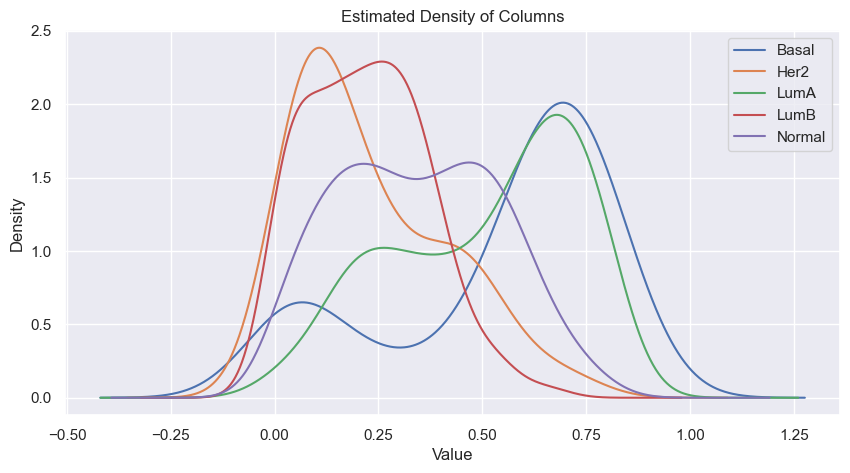

In [319]:
sigma_3s = []

plt.figure(figsize=(10, 5))
for column in df_without_union_samples.columns:
    # Do not conside zero correlations
    label_column = df_without_union_samples[column]
    label_column[label_column>0].plot.kde(label=column)

    # Calculate 3*sigma for each column
    sigma_3 = 3 * np.std(label_column)
    sigma_3s.append(sigma_3)

df_sigma_3 = pd.Series(sigma_3s, index=df_without_union_samples.columns)

plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Estimated Density of Columns')
plt.show()

In [320]:
df_sigma_3

Basal     0.789500
Her2      0.350468
LumA      0.881906
LumB      0.415392
Normal    0.679257
dtype: float64

In [321]:
from scipy.stats import ttest_ind

# Perform T-test for each column
for column in df_union.columns:
    t_stat, p_value = ttest_ind(
        df_union[column], 
        df_without_union_samples[column])

    print("T-statistic " + column + ": ", t_stat)
    print("P-value: " + column + ": ", p_value, '\n')

T-statistic Basal:  -1.266895633369456
P-value: Basal:  0.2061314851311838 

T-statistic Her2:  1.6543767320699785
P-value: Her2:  0.09905020944266364 

T-statistic LumA:  -3.6968572987396198
P-value: LumA:  0.0002575309977724625 

T-statistic LumB:  0.16351797126966933
P-value: LumB:  0.8702158189531686 

T-statistic Normal:  -2.7995247042001297
P-value: Normal:  0.00543457731207559 



## Three-labelled samples

In [357]:
# Samples with 3 labels
three_label_test_samples_idx = set(y_test_5perc[y_test_5perc.sum(axis=1) == 3].index)

three_label_test_samples = df_multi.iloc[list(three_label_test_samples_idx), -5:]
three_label_test_samples

,Basal,Her2,LumA,LumB,Normal
6,0.0,0.167827,0.284802,0.419736,0.000000
905,0.0,0.275486,0.150732,0.158415,0.000000
909,0.0,0.232653,0.224970,0.000000,0.154094
751,0.0,0.135270,0.208739,0.314670,0.000000
892,0.0,0.315342,0.197887,0.201825,0.000000
1023,0.0,0.184634,0.196447,0.293637,0.000000


In [363]:
three_label_test_samples_svm_lp_idx = set(svm_lp_preds[svm_lp_preds.sum(axis=1) == 3].index)
three_label_test_samples_svm_lp = df_multi.iloc[list(three_label_test_samples_svm_lp_idx), -5:]
three_label_test_samples_svm_lp

,Basal,Her2,LumA,LumB,Normal
322,0.409460,0.200288,0.000000,0.100312,0.000000
585,0.000000,0.000000,0.487155,0.175990,0.082929
336,0.257623,0.256951,0.000000,0.005234,0.000000
886,0.000000,0.470060,0.103577,0.052677,0.000000
87,0.000000,0.412341,0.030300,0.533349,0.000000


In [371]:
svm_lp_prob_preds.loc[list(three_label_test_samples_svm_lp_idx), :]

,Basal,Her2,LumA,LumB,Normal
322,0.293685,0.761007,0.037894,0.206342,0.080140
585,0.032637,0.351685,0.914028,0.369173,0.168773
336,0.370992,0.652052,0.061746,0.115142,0.241158
886,0.055537,0.518467,0.454242,0.569329,0.131220
87,0.052440,0.598097,0.466731,0.835460,0.058173


# One-labelled samples analysis

In [323]:
# Function to get custom sorted indices for each row
def rank_indices(row):
    return row.rank(ascending=False).astype(int)

def cmp_statistics_for_one_labelled_samples(predictions, gt_labels, df_multi, X_test_scaled_selected):

    # Check dimensions
    assert predictions.shape == gt_labels.shape

    # Set the original indices
    predictions.set_index(gt_labels.index, inplace=True)

    # Get samples's predictions and GTs with only one label
    preds_one_label_idx = predictions.sum(axis=1) == 1
    preds_one_label = predictions[predictions.sum(axis=1) == 1]
    gt_samples_one_label = gt_labels[gt_labels.sum(axis=1) == 1]

    print("Number of 1-labelled samples from GT test set: ", gt_samples_one_label.shape[0])
    print("Number of 1-labelled samples from predicted test set: ", preds_one_label.shape[0])

    # Find the samples with one label that appeared in GT and prediction
    one_label_overlap_idx = set(gt_samples_one_label.index).\
        intersection(set(preds_one_label.index))
    print('Number of samples that overlap:', len(one_label_overlap_idx))

    # Now check how many of them have the exact same label assigned
    overlap = preds_one_label.loc[list(one_label_overlap_idx), :]
    gt_overlap = gt_samples_one_label.loc[list(one_label_overlap_idx), :]
    print('Number of samples correctly predicted: ', len(one_label_overlap_idx) - (overlap != gt_overlap).sum(axis=1).sum())

    # Applying the rank-function to each row of the GT correlation/membership values
    X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
    ranked_indices = X_corr_test.apply(rank_indices, axis=1)

    # Create DataFrame from ranked values
    ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
    assert ranked_corr_df.shape == gt_labels.shape
    ranked_corr_labelled_df = ranked_corr_df * gt_labels

    # Find rows with only one label in the predictions DataFrame
    single_label_rows = predictions.sum(axis=1) == 1

    # Extract corresponding rows from predictions and GT ranks and GT labels
    ranked_for_single_label = ranked_corr_labelled_df[single_label_rows]
    predictions_df = predictions[single_label_rows]
    gt_df = gt_labels[single_label_rows]

    print('Number of well predicted:', ((predictions_df==gt_df).sum(axis=1) == 5).sum())

    # Count how many samples where 1 is in predictions correspond to rank 1 in the ranked DataFrame
    count_ones_at_rank_one = ((ranked_for_single_label == 1) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_two = ((ranked_for_single_label == 2) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_zero = ((ranked_for_single_label == 0) & (predictions_df == 1)).sum().sum()
    # Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
    count_ones_at_rank_three = ((ranked_for_single_label == 3) & (predictions_df == 1)).sum().sum()

    print("Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame:", count_ones_at_rank_one)
    print("Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame:", count_ones_at_rank_two)
    print("Number of samples where 1 is in predictions and corresponds to rank 0 in ranked DataFrame:", count_ones_at_rank_zero)
    print("Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame:", count_ones_at_rank_three)

print('XGBoost with Binary Relenace:')    
cmp_statistics_for_one_labelled_samples(predictions=xgb_br_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nXGBoost with Chain Clasifier:')
cmp_statistics_for_one_labelled_samples(predictions=xgb_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Binary Relevance:')
cmp_statistics_for_one_labelled_samples(predictions=lr_br_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nLogistic Regression with Chain Clasifier:')
cmp_statistics_for_one_labelled_samples(predictions=lr_cc_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nSVM with Label Powerset:')
cmp_statistics_for_one_labelled_samples(predictions=svm_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)
print('\nRandom Forest with Label Powerset:')
cmp_statistics_for_one_labelled_samples(predictions=rf_lp_preds, gt_labels=y_test_5perc, df_multi=df_multi, X_test_scaled_selected=X_test_scaled_selected)

XGBoost with Binary Relenace:
Number of 1-labelled samples from GT test set:  162
Number of 1-labelled samples from predicted test set:  163
Number of samples that overlap: 128
Number of samples correctly predicted:  126
Number of well predicted: 127
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 155
Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame: 6
Number of samples where 1 is in predictions and corresponds to rank 0 in ranked DataFrame: 2
Number of samples where 1 is in predictions and corresponds to rank 3 in ranked DataFrame: 0

XGBoost with Chain Clasifier:
Number of 1-labelled samples from GT test set:  162
Number of 1-labelled samples from predicted test set:  162
Number of samples that overlap: 129
Number of samples correctly predicted:  123
Number of well predicted: 126
Number of samples where 1 is in predictions and corresponds to rank 1 in ranked DataFrame: 153
Number of samples where 1 is

In [324]:
# Set the original indices
xgb_br_preds.set_index(y_test_5perc.index, inplace=True)
xgb_br_prob_preds.set_index(y_test_5perc.index, inplace=True)

# Get samples's predictions with only one label
xgb_br_preds_one_label = xgb_br_preds[xgb_br_preds.sum(axis=1) == 1]
xgb_br_preds_one_label

,Basal,Her2,LumA,LumB,Normal
34,1,0,0,0,0
786,0,0,0,1,0
11,1,0,0,0,0
799,0,0,0,1,0
270,1,0,0,0,0
...,...,...,...,...,...
929,0,1,0,0,0
226,0,0,1,0,0
995,0,0,0,1,0
946,0,0,1,0,0


In [325]:
# Get samples's GT with only one label
gt_samples_one_label = y_test_5perc[y_test_5perc.sum(axis=1) == 1]
gt_samples_one_label

,Basal,Her2,LumA,LumB,Normal
34,1,0,0,0,0
786,0,0,0,1,0
11,1,0,0,0,0
799,0,0,0,1,0
270,1,0,0,0,0
...,...,...,...,...,...
226,0,0,1,0,0
995,0,0,0,1,0
917,0,1,0,0,0
148,0,0,0,0,1


In [326]:
# Find the samples with one label that appeared in GT and prediction
one_label_overlap_idx = set(gt_samples_one_label.index).\
    intersection(set(xgb_br_preds_one_label.index))
print('Number of samples that overlap:', len(one_label_overlap_idx))

# Now check how many of them have the exact same label assigned
xgb_br_overlap = xgb_br_preds_one_label.loc[list(one_label_overlap_idx), :]
gt_overlap = gt_samples_one_label.loc[list(one_label_overlap_idx), :]

print('Number of samples correctly predicted: ', len(one_label_overlap_idx) - (xgb_br_overlap != gt_overlap).sum(axis=1).sum())

Number of samples that overlap: 128
Number of samples correctly predicted:  126


In [327]:
# Samples with only one label (Ground Truth)
one_label_test_samples_gt_idx = set(y_test_5perc[y_test_5perc.sum(axis=1) == 1].index)
one_label_test_samples_gt = df_multi.iloc[list(one_label_test_samples_gt_idx), -5:]

# Samples with only one label (Predicted)
one_label_test_samples_pred_idx = preds_idx[xgb_br_preds.sum(axis=1) == 1]
one_label_test_samples_pred = df_multi.iloc[list(one_label_test_samples_pred_idx), -5:]

one_label_test_samples_pred, one_label_test_samples_gt


(        Basal      Her2      LumA      LumB    Normal
 34   0.729748  0.000000  0.000000  0.000000  0.257143
 786  0.000000  0.000000  0.000000  0.357023  0.000000
 11   0.749244  0.000000  0.000000  0.000000  0.245714
 799  0.000000  0.072461  0.000000  0.354430  0.000000
 270  0.701032  0.000000  0.000000  0.000000  0.229388
 ..        ...       ...       ...       ...       ...
 929  0.000000  0.535462  0.000000  0.012341  0.000000
 226  0.000000  0.106651  0.340024  0.039520  0.114142
 995  0.000000  0.124034  0.000000  0.486483  0.000000
 946  0.000000  0.000000  0.615654  0.000000  0.251188
 991  0.000000  0.073229  0.278271  0.308139  0.000000
 
 [163 rows x 5 columns],
          Basal      Her2      LumA      LumB    Normal
 1     0.000000  0.647827  0.000000  0.247731  0.000000
 516   0.000000  0.000000  0.580312  0.152365  0.118463
 1034  0.112605  0.000000  0.000000  0.000000  0.297287
 11    0.749244  0.000000  0.000000  0.000000  0.245714
 10    0.000000  0.474766  0.0000

In [293]:
X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
X_corr_test

,Basal,Her2,LumA,LumB,Normal
34,0.729748,0.000000,0.000000,0.000000,0.257143
786,0.000000,0.000000,0.000000,0.357023,0.000000
451,0.000000,0.000000,0.793421,0.000000,0.480624
11,0.749244,0.000000,0.000000,0.000000,0.245714
599,0.000000,0.000000,0.732917,0.000000,0.653974
...,...,...,...,...,...
995,0.000000,0.124034,0.000000,0.486483,0.000000
917,0.000000,0.316879,0.000000,0.000000,0.000000
148,0.103866,0.000000,0.195102,0.000000,0.412533
946,0.000000,0.000000,0.615654,0.000000,0.251188


In [41]:
# Function to get custom sorted indices for each row
def custom_sort_indices(row):
    return row.rank(ascending=False).astype(int)

# Applying the function to each row of the DataFrame
ranked_indices = X_corr_test.apply(custom_sort_indices, axis=1)

# If you want the result as a DataFrame, you can convert it like this:
ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
ranked_corr_df

,Basal,Her2,LumA,LumB,Normal
34,1,4,4,4,2
786,3,3,3,1,3
451,4,4,1,4,2
11,1,4,4,4,2
599,4,4,1,4,2
...,...,...,...,...,...
995,4,2,4,1,4
917,3,1,3,3,3
148,3,4,2,4,1
946,4,4,1,4,2


In [70]:
# Step 1: Find rows with only one label in the predictions DataFrame
single_label_rows = xgb_br_preds.sum(axis=1) == 1

# Step 2: Extract corresponding rows from the ranked DataFrame
ranked_for_single_label = ranked_corr_df[single_label_rows]
predictions_df = xgb_br_preds[single_label_rows]
gt_df = y_test_5perc[single_label_rows]

# Step 3: Count how many samples where 1 is in predictions correspond to rank 2 in the ranked DataFrame
count_ones_at_rank_two = ((ranked_for_single_label == 2) & (predictions_df == 1)).sum().sum()

print("Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame:", count_ones_at_rank_two)

Number of samples where 1 is in predictions and corresponds to rank 2 in ranked DataFrame: 6


In [202]:
def cmp_statistics_for_two_labelled_samples(predictions, probs, gt_labels, df_multi, X_test_scaled_selected):

    # Check dimensions
    assert predictions.shape == gt_labels.shape

    # Set the original indices
    predictions.set_index(gt_labels.index, inplace=True)
    probs.set_index(gt_labels.index, inplace=True)

    # Get samples's predictions and GTs with only two labels
    preds_two_labels_idx = predictions.sum(axis=1) == 2
    preds_two_labels = predictions[predictions.sum(axis=1) == 2]
    gt_samples_two_labels = gt_labels[gt_labels.sum(axis=1) == 2]

    print("Number of 2-labelled samples from GT test set: ", gt_samples_two_labels.shape[0])
    print("Number of 2-labelled samples from predicted test set: ", preds_two_labels.shape[0])

    # Find the samples with one label that appeared in GT and prediction
    two_labels_overlap_idx = set(gt_samples_two_labels.index).\
        intersection(set(preds_two_labels.index))
    print('Number of samples that overlap:', len(two_labels_overlap_idx))

    # Applying the rank-function to each row of the GT correlation/membership values
    X_corr_test = df_multi.iloc[X_test_scaled_selected.index, -5:]
    ranked_indices = X_corr_test.apply(rank_indices, axis=1)
    ranked_prob_indices = probs.apply(rank_indices, axis=1)

    # Create DataFrame from ranked values
    ranked_corr_df = pd.DataFrame(ranked_indices.values.tolist(), columns=X_corr_test.columns, index=X_corr_test.index)
    ranked_prob_df = pd.DataFrame(ranked_prob_indices.values.tolist(), columns=probs.columns, index=probs.index)

    assert ranked_corr_df.shape == gt_labels.shape
    ranked_corr_labelled_df = ranked_corr_df * gt_labels

    assert ranked_prob_df.shape == predictions.shape
    ranked_prob_labelled_df = ranked_prob_df * predictions

    # Find rows with only one label in the predictions DataFrame
    two_labelled_rows = predictions.sum(axis=1) == 2

    # Extract corresponding rows from predictions and GT ranks and GT labels
    ranked_for_double_label = ranked_corr_labelled_df[two_labelled_rows]
    ranked_probs_for_double_label = ranked_prob_labelled_df[two_labelled_rows]
    predictions_df = predictions[two_labelled_rows]
    gt_df = gt_labels[two_labelled_rows]

    # Count how many samples where 1 is in predictions correspond to rank 1 and 2 in correct order
    count_doubles_at_order_rank = ((((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 1)) | \
                                    ((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 2))).sum(axis=1) == 2).sum()

    print("Number of samples correctly predicted in fixed order: ", count_doubles_at_order_rank)
    print("Number of samples correctly predicted in any order: ", ((predictions_df==gt_df).sum(axis=1) == 5).sum())

    # print(ranked_for_double_label, ranked_probs_for_double_label)

    # Count how many samples have same primary (pp), same secondary (ss) labels
    count_doubles_pp = (((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()
    count_doubles_ss = (((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are primary but predicted as secondary (ps)
    count_doubles_ps = (((ranked_for_double_label == 1) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are secondary but predicted as primary (sp)
    count_doubles_sp = (((ranked_for_double_label == 2) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()

    # Count how many samples have are terciry but predicted as secondary (ts)
    count_doubles_ts = (((ranked_for_double_label == 3) & (ranked_probs_for_double_label == 2))).sum(axis=1).sum()

    # Count how many samples have are terciary but predicted as primary (tp)
    count_doubles_tp = (((ranked_for_double_label == 3) & (ranked_probs_for_double_label == 1))).sum(axis=1).sum()

    # Count how many samples are not correctly predicted at all
    count_wrong = ((predictions_df == gt_df).sum(axis=1) == 0).sum()

    print('Number of samples pp: ', count_doubles_pp)
    print('\nNumber of samples ss: ', count_doubles_ss)
    print('\nNumber of samples ps: ', count_doubles_ps)
    print('\nNumber of samples sp: ', count_doubles_sp)
    print('\nNumber of samples ts: ', count_doubles_ts)
    print('\nNumber of samples tp: ', count_doubles_tp)
    print('\nTotally wrong predicted: ', count_wrong)


In [203]:
print('XGBoost with Binary Relevance: ')
cmp_statistics_for_two_labelled_samples(predictions=xgb_br_preds, probs=xgb_br_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('XGBoost with Chain Classifier: ')
cmp_statistics_for_two_labelled_samples(predictions=xgb_cc_preds, probs=xgb_cc_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Logistic Regression with Binary Relevance: ')
cmp_statistics_for_two_labelled_samples(predictions=lr_br_preds, probs=lr_br_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Logistic Regression with Chain Classifier: ')
cmp_statistics_for_two_labelled_samples(predictions=lr_cc_preds, probs=lr_cc_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('SVM with Label Powerset: ')
cmp_statistics_for_two_labelled_samples(predictions=svm_lp_preds, probs=svm_lp_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

print('Random Forest with Label Powerset: ')
cmp_statistics_for_two_labelled_samples(predictions=rf_lp_preds, probs=rf_lp_prob_preds, 
                                        gt_labels=y_test_5perc, df_multi=df_multi, 
                                        X_test_scaled_selected=X_test_scaled_selected)

XGBoost with Binary Relevance: 
Number of 2-labelled samples from GT test set:  148
Number of 2-labelled samples from predicted test set:  142
Number of samples that overlap: 116
Number of samples correctly predicted in fixed order:  93
Number of samples correctly predicted in any order:  115
Number of samples pp:  113

Number of samples ss:  94

Number of samples ps:  27

Number of samples sp:  24

Number of samples ts:  0

Number of samples tp:  1

Totally wrong predicted:  0
XGBoost with Chain Classifier: 
Number of 2-labelled samples from GT test set:  148
Number of 2-labelled samples from predicted test set:  144
Number of samples that overlap: 115
Number of samples correctly predicted in fixed order:  98
Number of samples correctly predicted in any order:  115
Number of samples pp:  121

Number of samples ss:  99

Number of samples ps:  21

Number of samples sp:  18

Number of samples ts:  2

Number of samples tp:  1

Totally wrong predicted:  0
Logistic Regression with Binary Re